## Fonte:

https://embarcados.com.br/processamento-de-imagens-com-opencv-no-raspberry-pi-zero/

## Bibliotecas

In [38]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## Carregar e redimensionar imagem

In [39]:
from google.colab import drive
drive.mount('/content/drive')
PATH='drive/My Drive/CPQD/00_mm/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


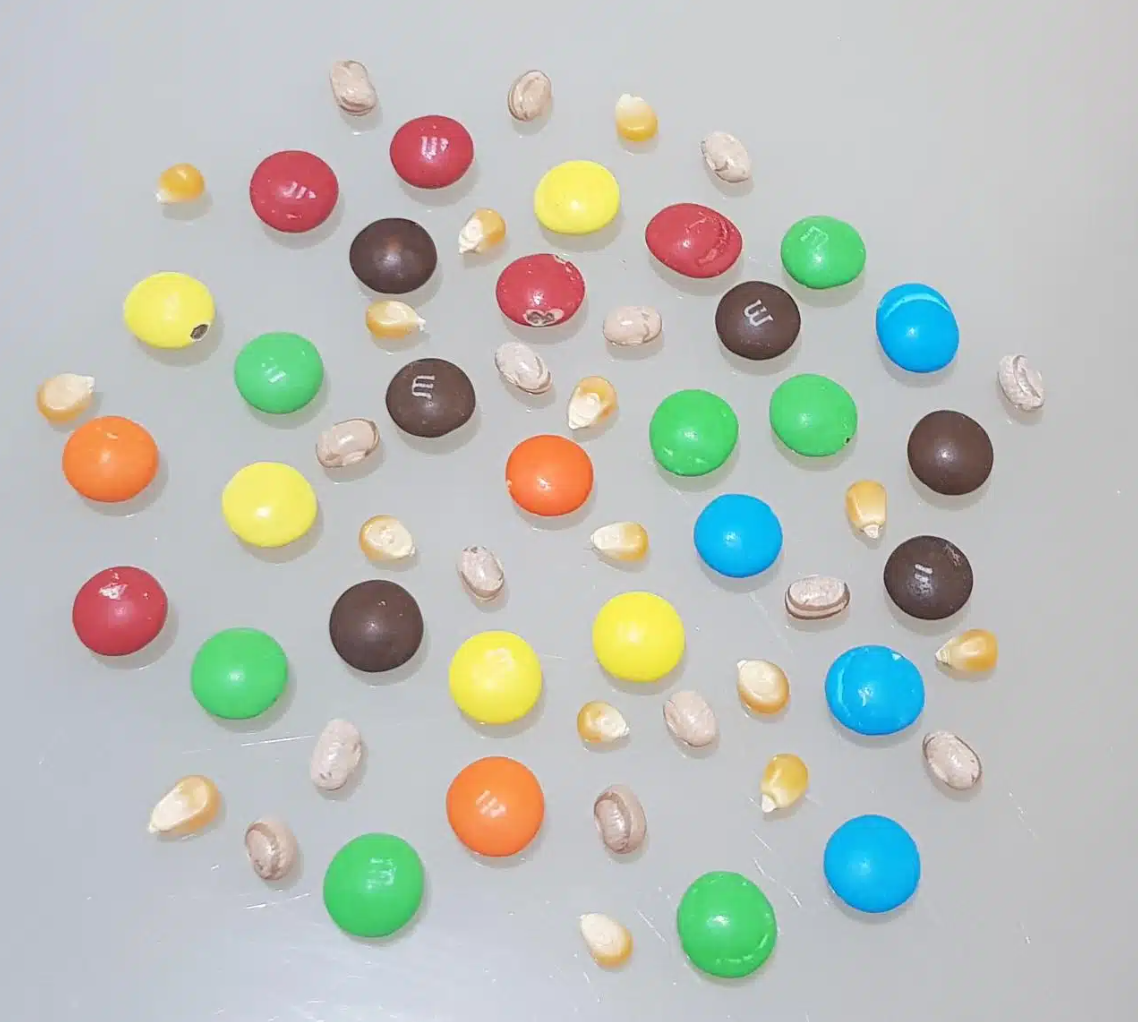

In [40]:
img = cv2.imread(PATH+"mm.PNG")
cv2_imshow(img)

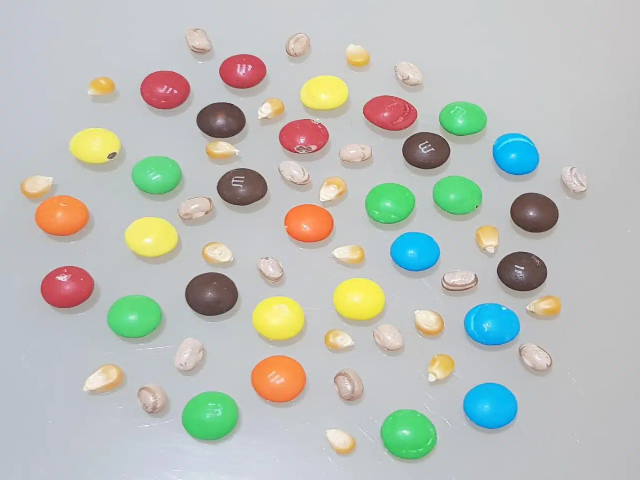

In [41]:
new_width = 640
new_heigth = 480
new_size = (new_width,new_heigth)

imgg = cv2.resize(img,new_size)
cv2_imshow(imgg)

## Conversão de BGR para HSV

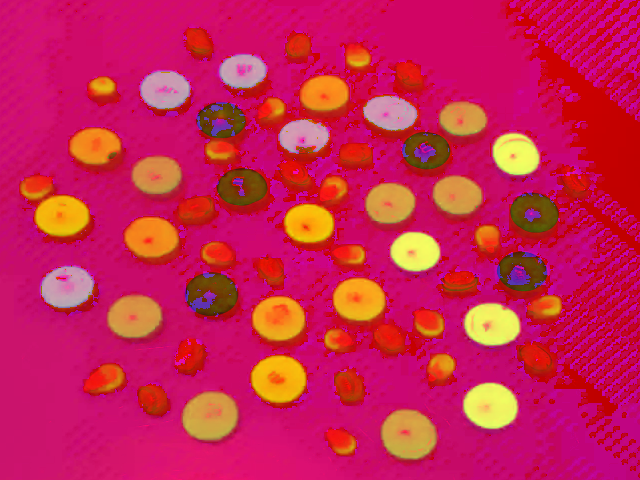

In [42]:
img_hsv = cv2.cvtColor(imgg, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

## Criação de máscaras

In [43]:
blue_mask = cv2.inRange(img_hsv,(90,66,153),(130,255,255))
green_mask = cv2.inRange(img_hsv,(57,50,140),(75,255,255))
yellow_mask = cv2.inRange(img_hsv,(22,30,190),(30,255,255))
brown1_mask= cv2.inRange(img_hsv,(140,15,80),(180,91,215))
brown2_mask= cv2.inRange(img_hsv,(0,15,75),(9,91,170))
red_mask = cv2.inRange(img_hsv,(150,40,130),(180,255,255))
orange_mask = cv2.inRange(img_hsv,(3,70,100),(13,255,255))

### Azul

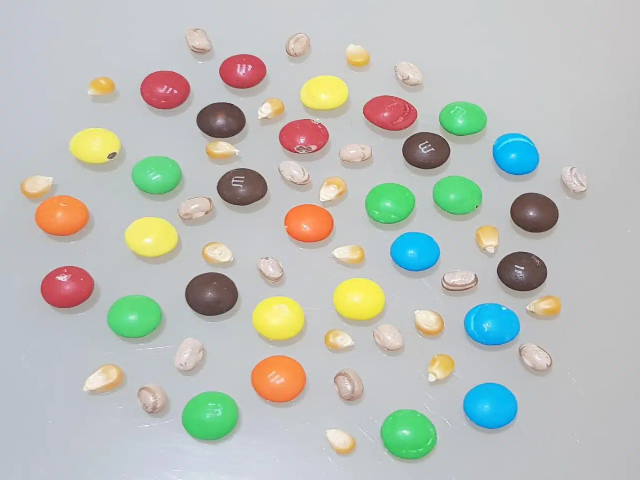

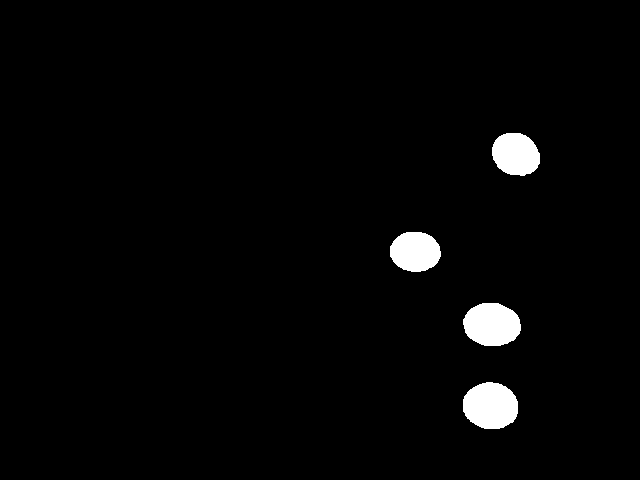

In [44]:
cv2_imshow(imgg)
cv2_imshow(blue_mask)

### Verde

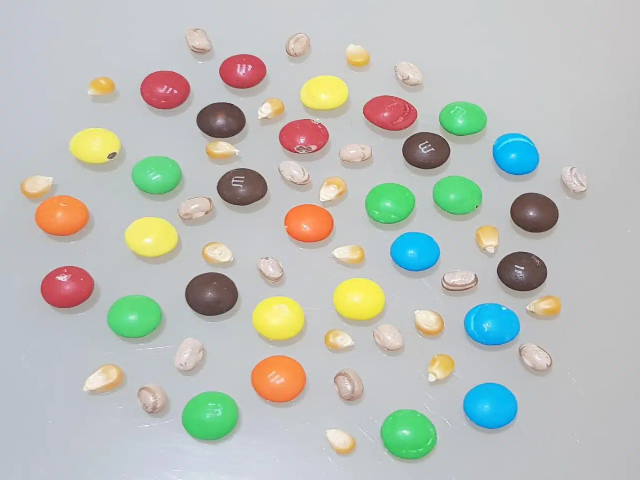

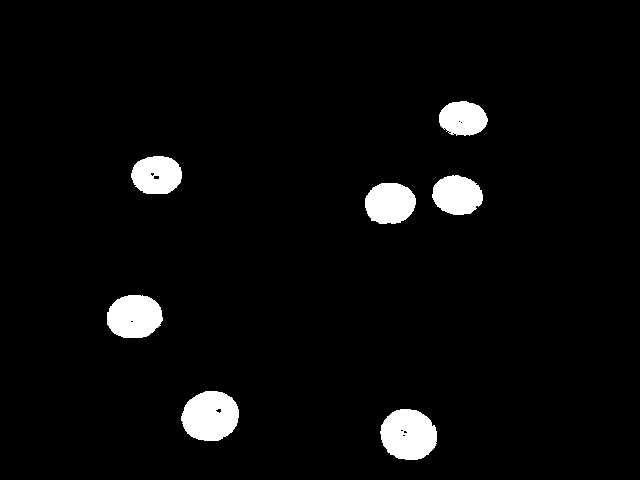

In [45]:
cv2_imshow(imgg)
cv2_imshow(green_mask)

### Amarelo

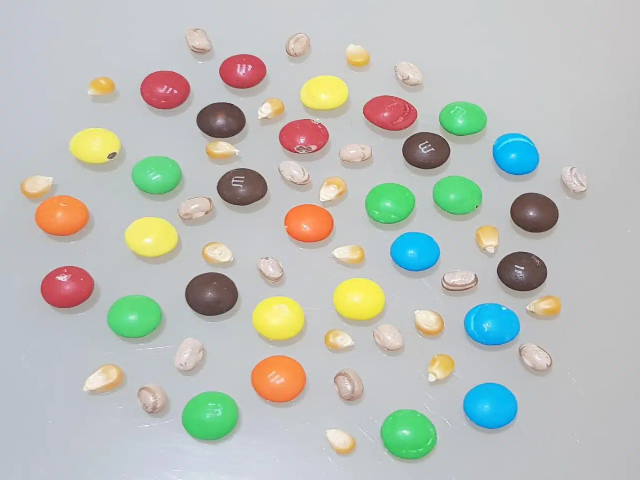

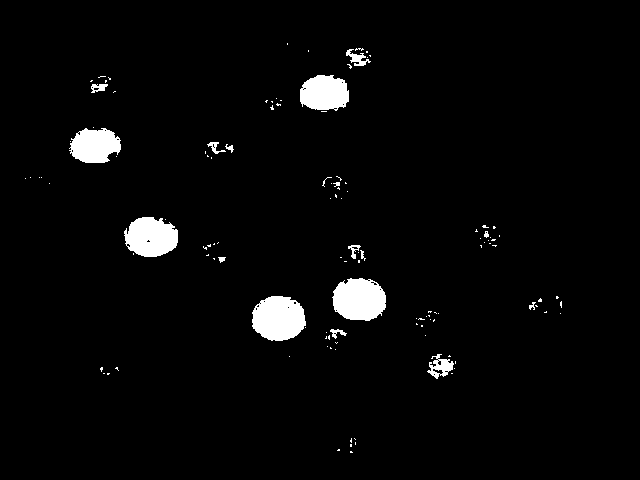

In [46]:
cv2_imshow(imgg)
cv2_imshow(yellow_mask)

### Marrom 1

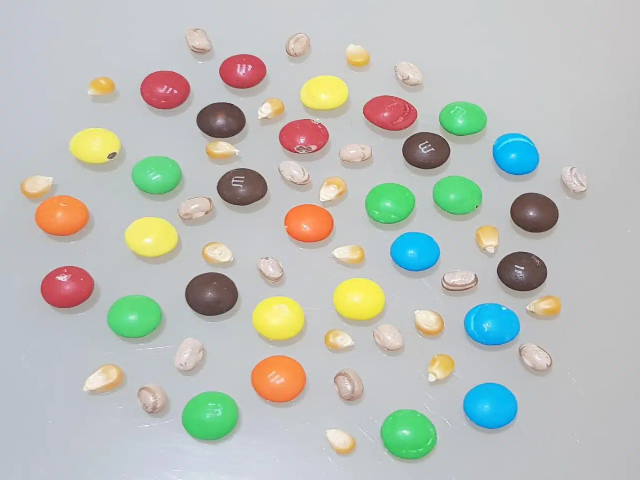

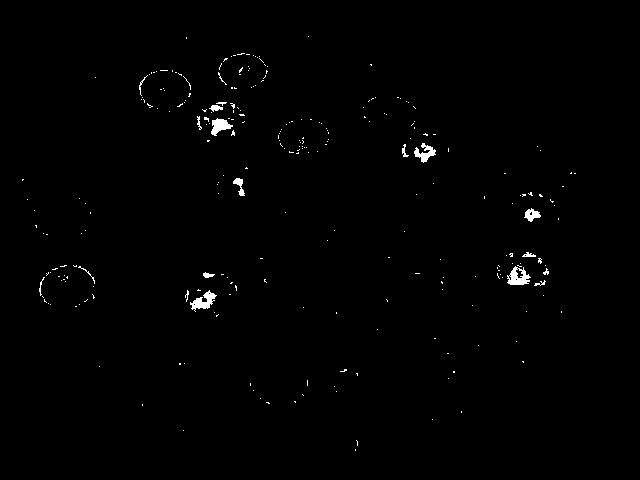

In [47]:
cv2_imshow(imgg)
cv2_imshow(brown1_mask)

### Marrom 2

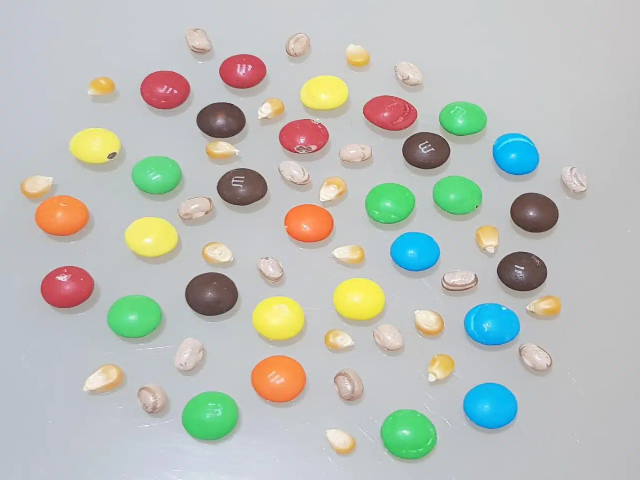

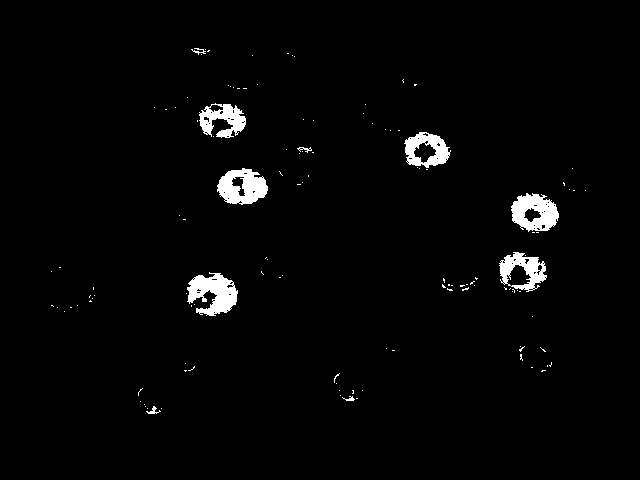

In [48]:
cv2_imshow(imgg)
cv2_imshow(brown2_mask)

### Vermelho

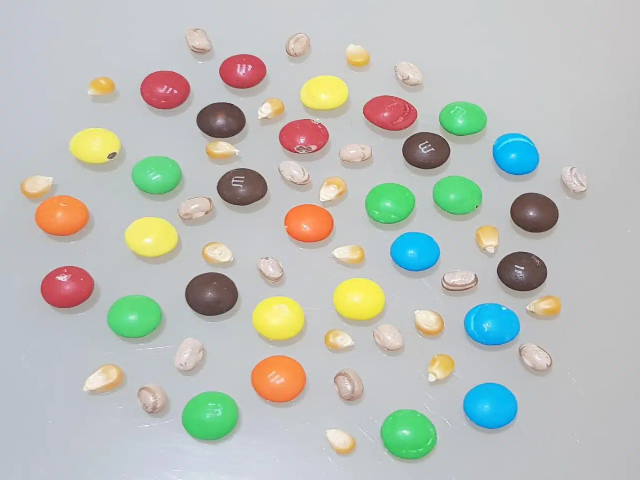

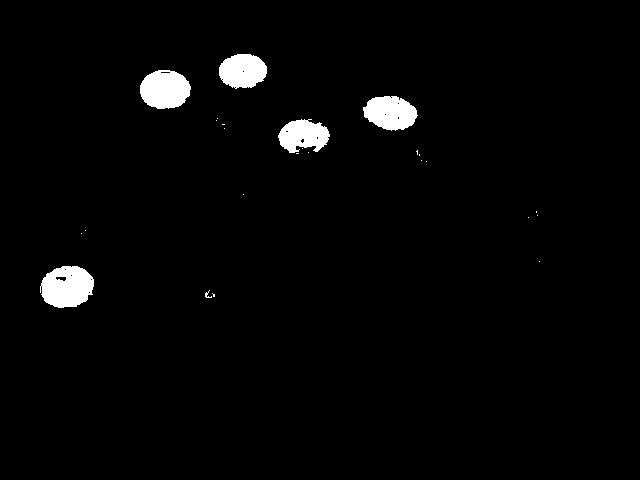

In [49]:
cv2_imshow(imgg)
cv2_imshow(red_mask)

### Laranja

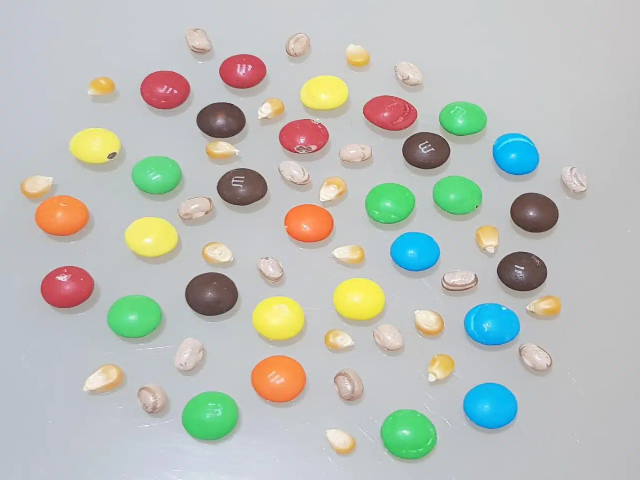

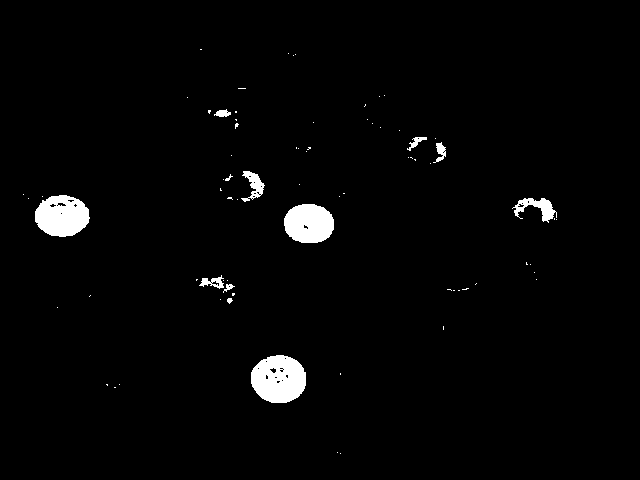

In [50]:
cv2_imshow(imgg)
cv2_imshow(orange_mask)

### Unir as máscaras de cor marrom

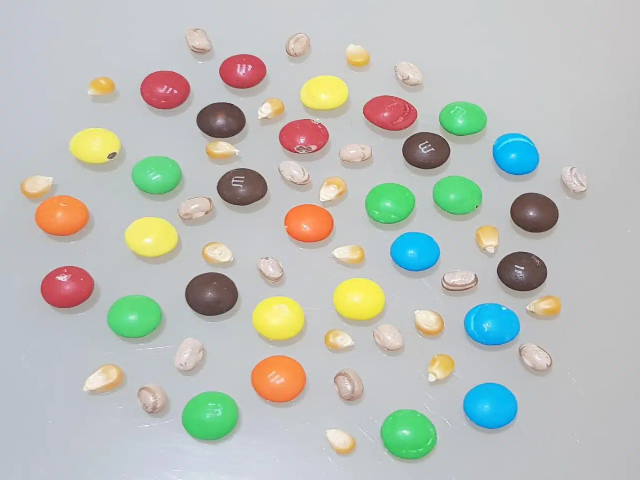

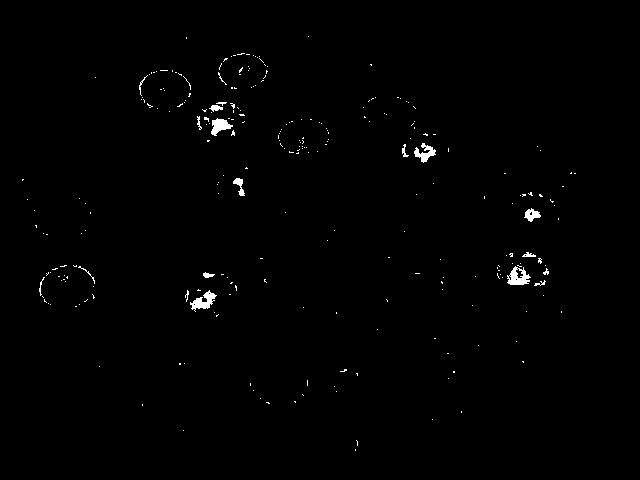

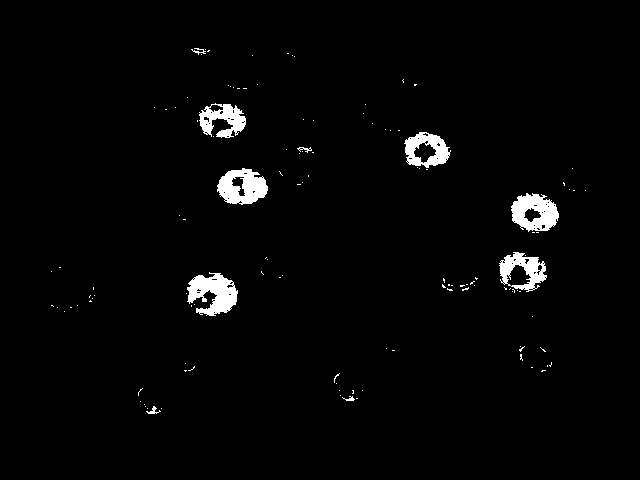

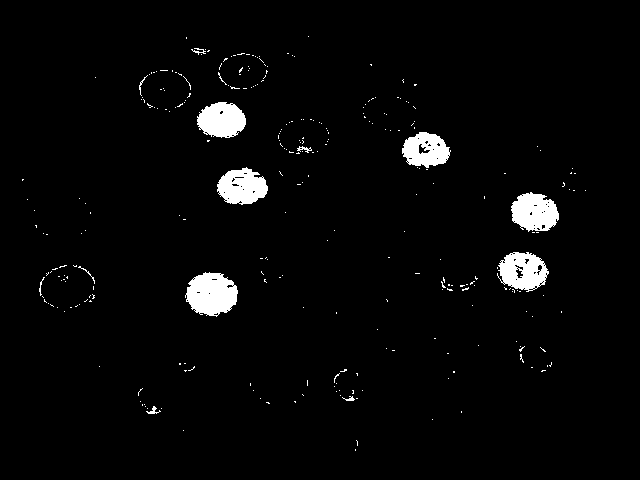

In [51]:
or_brown_mask = cv2.bitwise_or(brown1_mask,brown2_mask)
cv2_imshow(imgg)
cv2_imshow(brown1_mask)
cv2_imshow(brown2_mask)
cv2_imshow(or_brown_mask)

## Sobreposição de máscaras

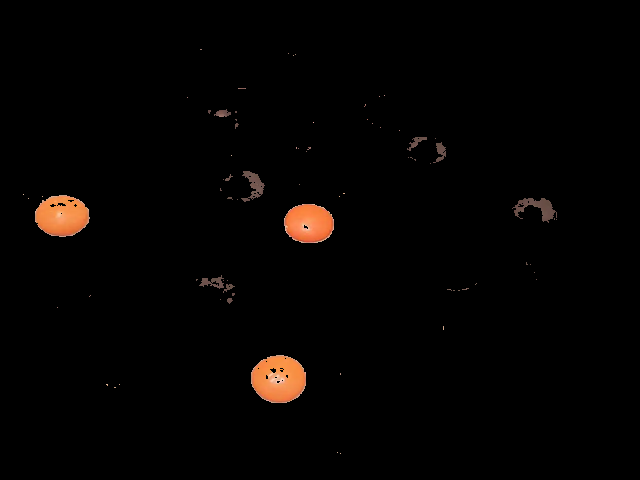

In [52]:
and_mask_example = cv2.bitwise_and(imgg,imgg,mask=orange_mask)
cv2_imshow(and_mask_example)

## Dilatação e Erosão

In [53]:
kernel = np.ones((3,3), np.uint8)

# filtros de erosão (eliminar ruídos)
blue_erode = cv2.erode(blue_mask,kernel,iterations=1)
yellow_erode = cv2.erode(yellow_mask,kernel,iterations=5)
brown_erode = cv2.erode(or_brown_mask,kernel,iterations=2)
red_erode = cv2.erode(red_mask,kernel,iterations=1)
orange_erode = cv2.erode(orange_mask,kernel,iterations=5)

# filtros de dilatação (preencher espaços com falhas nos objetos)
blue_dilate = cv2.dilate(blue_erode,kernel,iterations=1)
gree_dilate = cv2.dilate(green_mask,kernel,iterations=1)
yellow_dilate = cv2.dilate(yellow_erode,kernel,iterations=6)
brown_dilate = cv2.dilate(brown_erode,kernel,iterations=4)
red_dilate = cv2.dilate(red_erode,kernel,iterations=1)
orange_dilate = cv2.dilate(orange_erode,kernel,iterations=6)

### Marrom

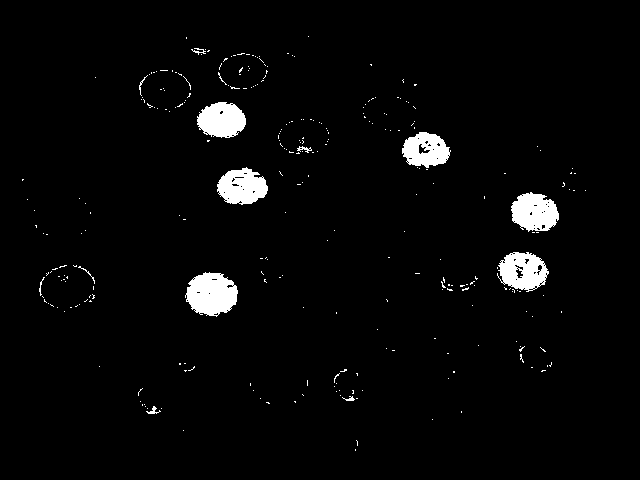

In [54]:
cv2_imshow(or_brown_mask)

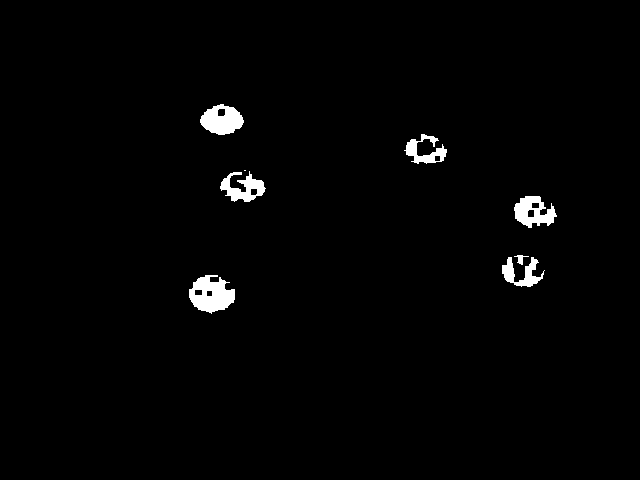

In [55]:
cv2_imshow(brown_erode)

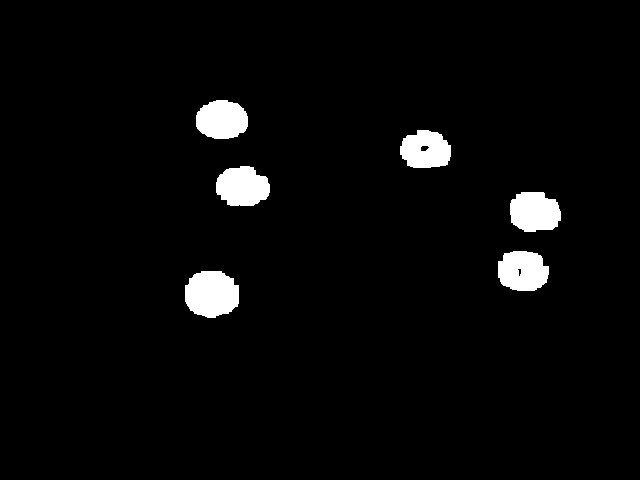

In [56]:
cv2_imshow(brown_dilate)

### Laranja

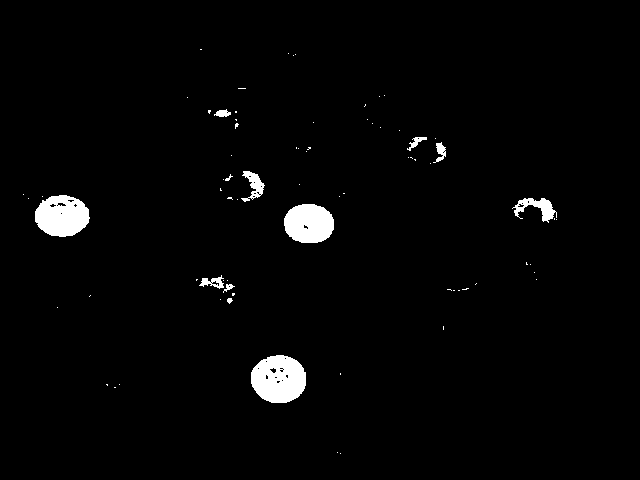

In [57]:
cv2_imshow(orange_mask)

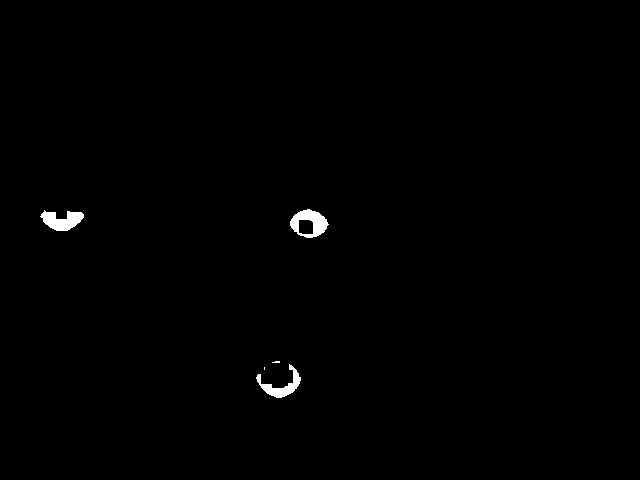

In [58]:
cv2_imshow(orange_erode)

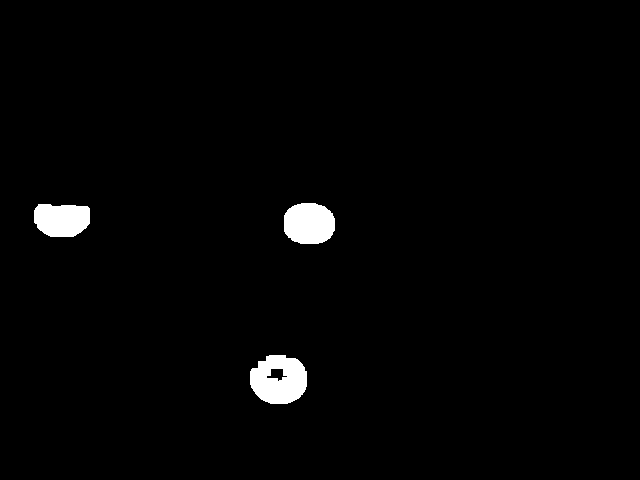

In [59]:
cv2_imshow(orange_dilate)

## Encontrar os objetos

A função para findContours() descrita no site abaixo é um pouco diferente da que utilizamos no código, pois retorna uma imagem nova.

No código, o resultado é sobrescrito na imagem de origem.

* cv.findContours: https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

There are three arguments in cv.findContours() function:
* first one is source image
* second is contour retrieval mode
* third is contour approximation method

And it outputs a modified image, the contours and hierarchy.

---

Já para a função drawContours(), temos:
* first argument is source image
* second argument is the contours which should be passed as a Python list
* third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1)
* remaining arguments are color, thickness etc.

In [60]:
cont = 0
name = ["azul","verde","amarelo","marrom","vermelho","laranja"]
color = [(255,0,0),(0,255,0),(0,255,255),(0,75,150),(0,0,255),(0,165,255)]
array = [blue_dilate,gree_dilate,yellow_dilate,brown_dilate,red_dilate,orange_dilate]

for i in range(len(array)):
  qtd = 0
  # argumentos: source image, retrieval mode, approx method
  contornos,hierarquia = cv2.findContours(array[i],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  for x in range(len(contornos)):
    area = cv2.contourArea(contornos[x])
    if(area>400):
        # argumentos: imagem, contornos (lista), índice do contorno, grossura
        desenho_contorno = cv2.drawContours(imgg,contornos,x,color[i],2)
        qtd +=1

  # argumentos: imagem, texto, posição, fonte, tamanho, cor, grossura, tipo de linha
  cv2.putText(imgg,name[i] + ": "+ str(qtd), (10+cont,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1, cv2.LINE_AA)
  cont+=110 # posicionar o texto

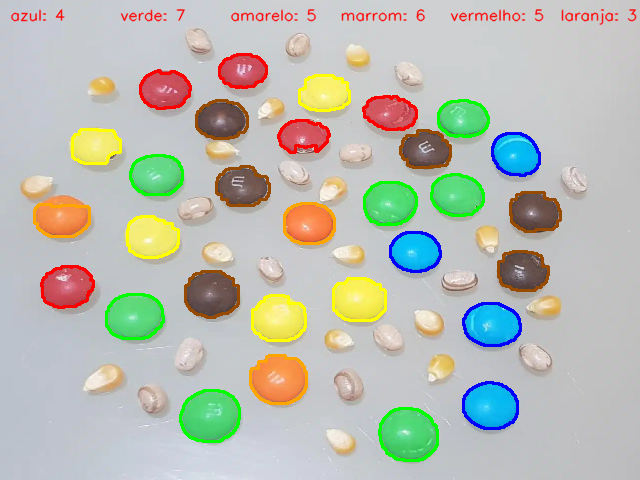

In [61]:
cv2_imshow(imgg)